# RNN Sentiment Classifier

Classifying IMDB reviews by their sentiment with an *RNN*.

#### Load dependencies 

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import SpatialDropout1D
from keras.layers import SimpleRNN
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Set Hyperparameter 

In [2]:
output_dir = './model_output/rnn'

epochs = 16
batch_size = 128

n_dim = 64
n_unique_words = 10000
max_review_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.2

n_rnn = 256
dropout_rnn = 0.2    #kernel

#### Load data 

In [3]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

#### Preprocess data 

In [4]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

#### Design NN Architecture

In [5]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout=dropout_rnn))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


#### configure model 

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Train! 

In [9]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/16
25000/25000 [==============================] - 15s 583us/step - loss: 0.7024 - acc: 0.5090 - val_loss: 0.6906 - val_acc: 0.5305
Epoch 2/16
25000/25000 [==============================] - 11s 446us/step - loss: 0.6940 - acc: 0.5218 - val_loss: 0.6841 - val_acc: 0.5346
Epoch 3/16
25000/25000 [==============================] - 11s 434us/step - loss: 0.6610 - acc: 0.5900 - val_loss: 0.6378 - val_acc: 0.6189
Epoch 4/16
25000/25000 [==============================] - 11s 422us/step - loss: 0.6294 - acc: 0.6488 - val_loss: 0.6150 - val_acc: 0.6511
Epoch 5/16
25000/25000 [==============================] - 11s 424us/step - loss: 0.5495 - acc: 0.7208 - val_loss: 0.5783 - val_acc: 0.6990
Epoch 6/16
25000/25000 [==============================] - 10s 419us/step - loss: 0.5216 - acc: 0.7452 - val_loss: 0.5671 - val_acc: 0.7264
Epoch 7/16
25000/25000 [==============================] - 11s 421us/step - loss: 0.4779 - acc: 0.7797 - val_loss: 0.

#### Evaluate 

In [10]:
model.load_weights(output_dir+'/weights.01.hdf5')

In [11]:
y_hat = model.predict_proba(x_valid)

In [12]:
y_hat[0]

array([0.5214203], dtype=float32)

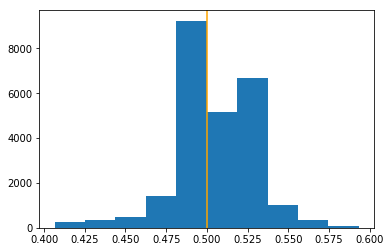

In [13]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [14]:
pct_auc = roc_auc_score(y_valid, y_hat)*100.0

In [15]:
"{:0.2f}".format(pct_auc)

'55.06'